In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
#from fastai.data_block import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
print('Setup Complete.')

Setup Complete.


In [22]:
import pandas as pd
df_raw = pd.read_pickle('tmp/music_neutral_EEG.pkl')
df_raw.head()

,delta-TP9,delta-AF7,delta-AF8,delta-TP10,theta-TP9,theta-AF7,theta-AF8,theta-TP10,alpha-TP9,alpha-AF7,alpha-AF8,alpha-TP10,beta-TP9,beta-AF7,beta-AF8,beta-TP10,Label
0,0.213514,2.399008,2.407957,0.393249,0.534341,0.836858,1.424246,0.657038,-0.467993,0.814466,0.643818,0.098162,-1.078152,0.973413,-0.246633,-0.845306,0.0
1,0.274502,0.921714,1.514658,0.496492,0.181557,-0.012250,0.626624,0.175984,-0.906638,0.832131,-0.332070,0.329700,-1.247669,-0.714387,-1.326559,-1.020843,0.0
2,0.069119,0.729497,1.285416,0.097301,-0.467740,0.760934,-0.579900,-0.558739,-1.301238,-0.218394,-0.055393,0.249293,-1.385920,0.074558,-1.289886,-0.749937,0.0
3,0.003141,0.480663,1.615700,-0.158431,-1.007132,1.443319,-0.212008,-0.532355,-1.779209,-1.227202,0.353502,-0.087381,-0.508575,-0.075375,-0.891891,-0.433480,0.0
4,-0.210349,0.119917,1.832329,-0.231751,-0.616393,1.045143,-0.127250,-0.344241,-1.137883,-1.686370,0.923469,-0.147632,0.351424,-1.111880,-1.395548,-0.580706,0.0


In [23]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [24]:
display_all(df_raw.tail().T)

,287,288,289,290,291
delta-TP9,0.621599,0.142506,0.368229,-0.226262,-0.730689
delta-AF7,0.128548,-0.297806,0.100094,-0.500569,-0.450749
delta-AF8,0.041879,0.005136,-0.451423,-0.775275,-1.475323
delta-TP10,0.235494,0.203106,0.119399,-0.361730,-0.406076
theta-TP9,-0.174439,0.321248,0.713166,0.332600,-0.070954
theta-AF7,0.663040,0.284305,-0.124793,0.162621,-0.605523
theta-AF8,-0.854652,-0.870200,-0.141202,-0.664219,-1.163639
theta-TP10,-0.458620,-0.023509,0.422463,-0.001546,-0.891475
alpha-TP9,-0.026204,-0.779671,-1.221266,-0.566167,0.143619
alpha-AF7,1.155755,0.256113,-0.518500,0.231011,-0.258749


In [25]:
display_all(df_raw.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
delta-TP9,292.0,0.000000e+00,1.001717,-1.539777,-0.580244,-0.242632,0.146494,3.501639
delta-AF7,292.0,2.433366e-17,1.001717,-2.006218,-0.632384,-0.178945,0.454799,3.789085
delta-AF8,292.0,6.083414e-17,1.001717,-2.214752,-0.639939,-0.085692,0.468411,3.578301
delta-TP10,292.0,-4.866731e-17,1.001717,-1.872250,-0.543783,-0.245096,0.166911,3.441628
theta-TP9,292.0,0.000000e+00,1.001717,-1.816295,-0.613013,-0.159334,0.326099,4.156030
theta-AF7,292.0,4.015053e-16,1.001717,-2.559619,-0.614453,-0.128570,0.450640,4.458840
theta-AF8,292.0,4.866731e-17,1.001717,-2.920800,-0.580978,-0.067485,0.419334,3.933540
theta-TP10,292.0,1.946692e-16,1.001717,-1.945200,-0.652640,-0.157991,0.349644,4.163253
alpha-TP9,292.0,1.460019e-16,1.001717,-2.446710,-0.622812,-0.016142,0.508253,3.577243
alpha-AF7,292.0,-6.448419e-16,1.001717,-2.807787,-0.688082,-0.037436,0.712176,2.688622


In [26]:
df_raw.head()

,delta-TP9,delta-AF7,delta-AF8,delta-TP10,theta-TP9,theta-AF7,theta-AF8,theta-TP10,alpha-TP9,alpha-AF7,alpha-AF8,alpha-TP10,beta-TP9,beta-AF7,beta-AF8,beta-TP10,Label
0,0.213514,2.399008,2.407957,0.393249,0.534341,0.836858,1.424246,0.657038,-0.467993,0.814466,0.643818,0.098162,-1.078152,0.973413,-0.246633,-0.845306,0.0
1,0.274502,0.921714,1.514658,0.496492,0.181557,-0.012250,0.626624,0.175984,-0.906638,0.832131,-0.332070,0.329700,-1.247669,-0.714387,-1.326559,-1.020843,0.0
2,0.069119,0.729497,1.285416,0.097301,-0.467740,0.760934,-0.579900,-0.558739,-1.301238,-0.218394,-0.055393,0.249293,-1.385920,0.074558,-1.289886,-0.749937,0.0
3,0.003141,0.480663,1.615700,-0.158431,-1.007132,1.443319,-0.212008,-0.532355,-1.779209,-1.227202,0.353502,-0.087381,-0.508575,-0.075375,-0.891891,-0.433480,0.0
4,-0.210349,0.119917,1.832329,-0.231751,-0.616393,1.045143,-0.127250,-0.344241,-1.137883,-1.686370,0.923469,-0.147632,0.351424,-1.111880,-1.395548,-0.580706,0.0


In [27]:
df=df_raw.iloc[:, 0:16]
y=df_raw.iloc[:,16]

In [28]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)
#Overtrained, but proving the model is working

C:\Users\tdgri\.julia\conda\3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8943835616438355

In [40]:
from sklearn.model_selection import train_test_split
X=df
X = StandardScaler().fit_transform(X)
X_train, X_valid, y_train, y_valid = \
        train_test_split(X, y, test_size=.1, random_state=42)
X_train=pd.DataFrame(X_train)
X_valid=pd.DataFrame(X_valid)
y_train=pd.DataFrame(y_train)
y_valid=pd.DataFrame(y_valid)
y_train=np.ravel(y_train.reset_index(drop='True'))
y_valid=np.ravel(y_valid.reset_index(drop='True'))

In [43]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [44]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.3658268613176469, 0.44596878319376526, 0.4646516345146482, 0.20089580345984448]


In [45]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\tdgri\.julia\conda\3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 110 ms
[0.1869808334056427, 0.34302575219167825, 0.8601445221445221, 0.5272321428571428]


In [47]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.5477225575051661, 1.0, -0.20535714285714282]


In [48]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([0.]), 0.0, 0.0)

In [49]:
preds.shape

(1, 30)

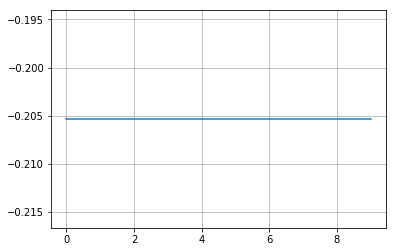

In [50]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);
plt.grid(True)

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

score_save = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    score_save.append(score)
dummy_data1 = {
        'Method': names,
        'Score': score_save}
results_data = pd.DataFrame(dummy_data1, columns = ['Method', 'Score'])

results_data

,Method,Score
0,Nearest Neighbors,0.833333
1,Linear SVM,0.733333
2,RBF SVM,0.466667
3,Gaussian Process,0.833333
4,Decision Tree,0.733333
5,Random Forest,0.800000
6,Neural Net,0.933333
7,AdaBoost,0.766667
8,Naive Bayes,0.700000
9,QDA,0.800000


In [52]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.21794608967740306, 0.3496841623141627, 0.8099869356001601, 0.5087003926963306, 0.36881029121369524]


In [55]:
df_raw

,delta-TP9,delta-AF7,delta-AF8,delta-TP10,theta-TP9,theta-AF7,theta-AF8,theta-TP10,alpha-TP9,alpha-AF7,alpha-AF8,alpha-TP10,beta-TP9,beta-AF7,beta-AF8,beta-TP10,Label
0,0.213514,2.399008,2.407957,0.393249,0.534341,0.836858,1.424246,0.657038,-0.467993,0.814466,0.643818,0.098162,-1.078152,0.973413,-0.246633,-0.845306,0.0
1,0.274502,0.921714,1.514658,0.496492,0.181557,-0.012250,0.626624,0.175984,-0.906638,0.832131,-0.332070,0.329700,-1.247669,-0.714387,-1.326559,-1.020843,0.0
2,0.069119,0.729497,1.285416,0.097301,-0.467740,0.760934,-0.579900,-0.558739,-1.301238,-0.218394,-0.055393,0.249293,-1.385920,0.074558,-1.289886,-0.749937,0.0
3,0.003141,0.480663,1.615700,-0.158431,-1.007132,1.443319,-0.212008,-0.532355,-1.779209,-1.227202,0.353502,-0.087381,-0.508575,-0.075375,-0.891891,-0.433480,0.0
4,-0.210349,0.119917,1.832329,-0.231751,-0.616393,1.045143,-0.127250,-0.344241,-1.137883,-1.686370,0.923469,-0.147632,0.351424,-1.111880,-1.395548,-0.580706,0.0
5,-0.051825,-0.263452,1.119956,-0.327761,-0.505222,0.152652,-0.513246,-0.258107,-0.828238,-1.597773,0.385438,-0.313688,0.287174,-1.351710,-2.052439,-0.951017,0.0
6,0.086974,-0.671780,1.001618,-0.122757,-0.682590,0.430467,-1.075897,-0.075021,-0.448091,-0.746614,-0.298868,-0.503815,-0.541788,-0.272356,-1.350803,-1.294469,0.0
7,-0.480012,-2.006218,-0.028464,-0.295416,-0.538043,-0.236132,-1.324888,-0.092515,-0.013630,0.435665,-0.533208,0.143743,-1.518596,0.596153,-0.822614,-0.923277,0.0
8,-0.405463,-1.644300,-0.270670,-0.242053,-0.017734,-0.174221,-0.019164,0.089024,0.491391,0.228489,0.077964,0.502514,-1.016791,0.695858,-1.372176,-0.801689,0.0
9,-0.432286,-0.152718,0.598483,-0.115877,0.133831,0.401195,0.130803,0.122528,0.354565,0.811382,0.698648,-0.230683,-0.320636,0.151858,-1.347009,-1.015522,0.0


Think about not normalizing and centering for RF

Let's see if neural can be a bit better for us

In [72]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

In [86]:
net = nn.Sequential(
    nn.Linear(1*16, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 2),
    nn.LogSoftmax()
).cuda()

In [87]:
path = 'data/EEG'
md = ImageClassifierData.from_arrays(path, (X_train,y_train), (X_valid, y_valid))

In [88]:
loss=nn.NLLLoss()
metrics=[accuracy]
# opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [89]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [90]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


KeyError: 145